## Group Activity Week 4
#### Data:Telco-Customer-Churn.xlsx

##### 1.Compare churn count with respect to gender.

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_excel('Telco-Customer-Churn.xlsx')
data.head()

#Data is loaded to dataframe

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [68]:
# Data is splitted Gender wise into 2 dataframes
data1=data[data['gender']=='Male']
data2=data[data['gender']=='Female']

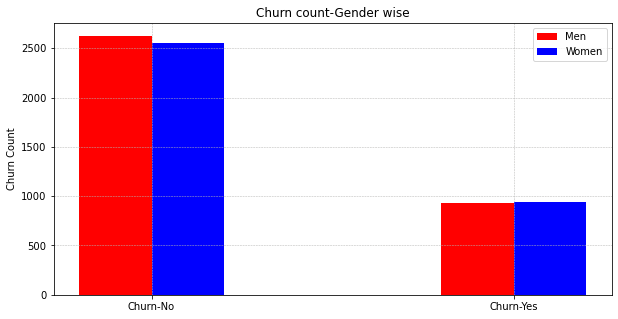

In [208]:
#Displaying data as bar plot
labels = ['Churn-No', 'Churn-Yes']
fig = plt.figure(figsize = (10, 5))
x = np.arange(len(labels)) 
width = 0.2
plot=plt.subplot(1,1,1)
rects1 = plot.bar(x - width/2, data1['Churn'].value_counts(), width,color ='red', label='Men')
rects2 = plot.bar(x + width/2,data2['Churn'].value_counts(), width,color ='blue', label='Women')
plot.set_ylabel('Churn Count')
plot.set_title('Churn count-Gender wise')
plot.set_xticks(x)
plt.grid(color = '#B7B6B5', linestyle = '--', linewidth = .5)
plot.set_xticklabels(labels)
plt.legend()
plt.show()

From the graph its identified that women churn out more than men

##### 2. Find out how many female senior citizens there in the dataset 

In [86]:
x=data[(data['gender']=='Female') & (data['SeniorCitizen']==1) ]
print("Number of Female senior citizans:",x['SeniorCitizen'].count())

Number of Female senior citizans: 568


##### 3. Compare 'tenure' with 'Total Charges' 

In [116]:
#New df is extracted with required columns
data3=data[['tenure','MonthlyCharges','TotalCharges']]   
data3

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.5
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.5
7039,72,103.20,7362.9
7040,11,29.60,346.45
7041,4,74.40,306.6


In [102]:
data3.dtypes
#datatypes shows totalcharges is in object format

tenure           int64
TotalCharges    object
dtype: object

In [118]:
#converting column Total charges as object to float
data3["TotalCharges"]  = pd.to_numeric(data3["TotalCharges"] , errors='coerce').fillna(0, downcast='infer')
#warning can be neglected

<ipython-input-118-f2df70c7fe0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["TotalCharges"]  = pd.to_numeric(data3["TotalCharges"] , errors='coerce').fillna(0, downcast='infer')


In [119]:
data3.dtypes

tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [209]:
#some basic analysis
# Mean of Params
data3.mean()

tenure              32.371149
MonthlyCharges      64.761692
TotalCharges      2279.734304
dtype: float64

In [109]:
# Minimum values of Parms
data3.min()

tenure          0.0
TotalCharges    0.0
dtype: float64

In [125]:
#Maximum of params
data3.max()

tenure              72.00
MonthlyCharges     118.75
TotalCharges      8684.80
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

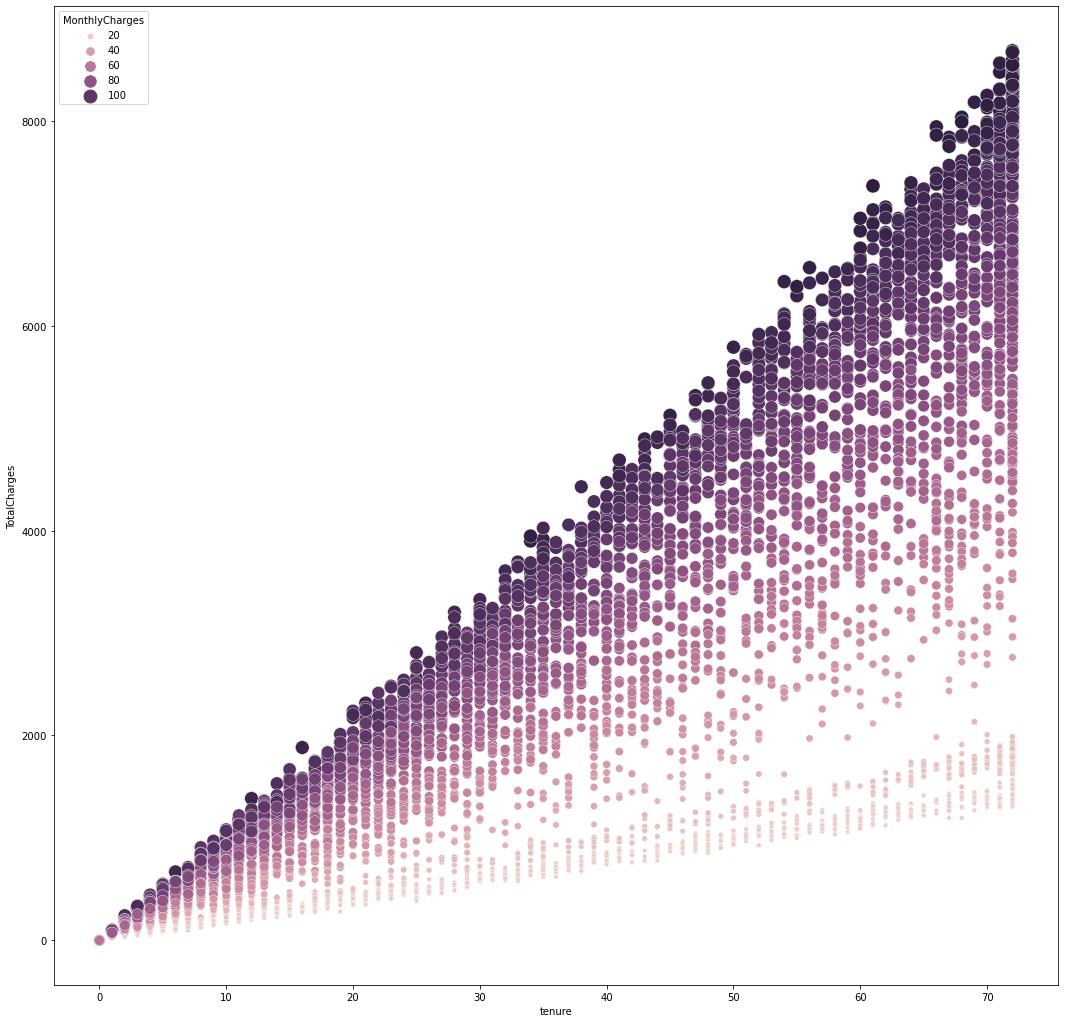

In [131]:
#Plotting the figure
plt.figure(figsize=(18,18))
sns.scatterplot(x=data3['tenure'],y=data3['TotalCharges'],hue=data3['MonthlyCharges'],size=data3['MonthlyCharges'],
    sizes=(20, 200))
plt.show

Total charges directly Propotional to tenure and monthly charges incurred. 

##### 4.Find out which contract prefered by the senior citizen.

In [134]:
data4=data[['SeniorCitizen','Contract']]
x=data4.groupby('Contract').sum()

,SeniorCitizen
Contract,
Month-to-month,807
One year,190
Two year,145


<AxesSubplot:xlabel='Contract'>

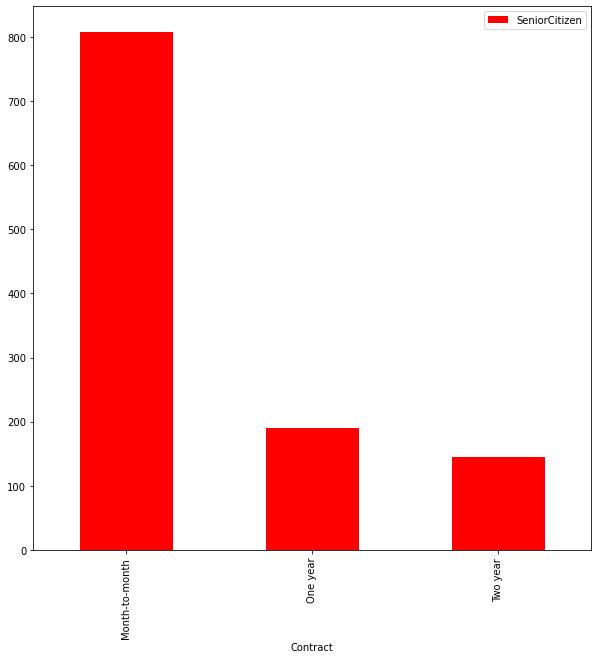

In [162]:
x.plot.bar(color='r',figsize=(10,10))

Senior citizens prefer month to month subscription

##### 5. Comment your finds on Payment Method?

Text(0.5, 1.0, 'Customer Payment Methods')

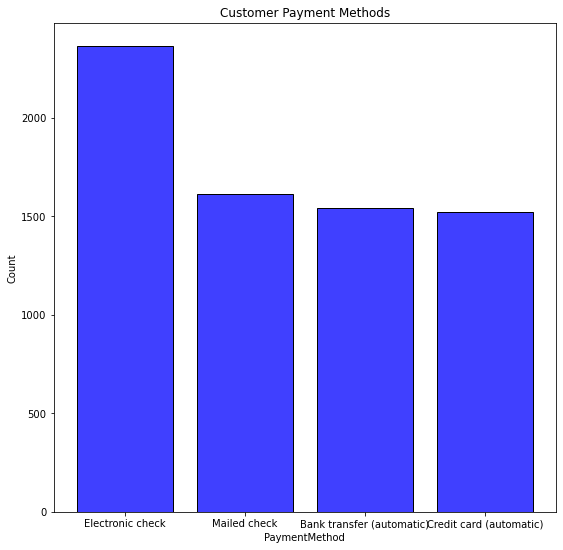

In [235]:
plt.figure(figsize=(9,9))
sns.histplot(data=data, x="PaymentMethod", shrink=.8, color='b',legend=True).set_title("Customer Payment Methods")
#plotting some graphs  to understand the payment method trends

Text(0.5, 1.0, 'Senior citizen vs Payment Methods')

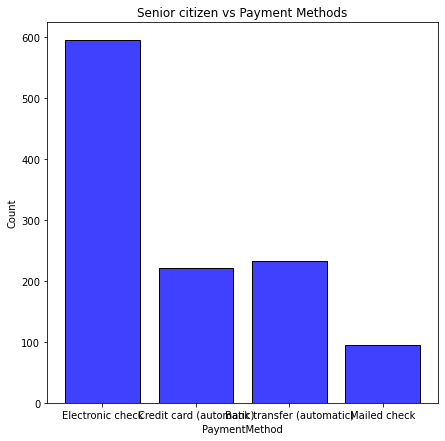

In [233]:
plt.figure(figsize=(7,7))
x=data[data['SeniorCitizen']==1]
sns.histplot(data=x, x="PaymentMethod", shrink=.8, color='b',legend=True).set_title("Senior citizen vs Payment Methods")


Text(0.5, 1.0, 'Non Senior Citizen vs Payment Methods')

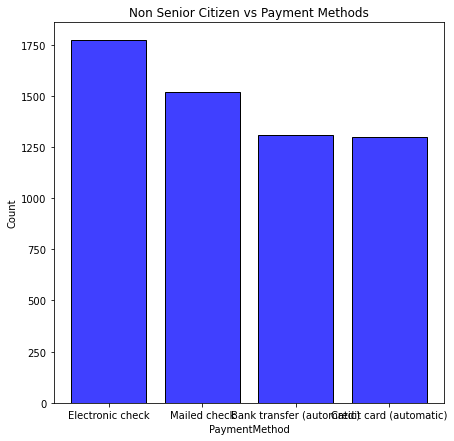

In [232]:
plt.figure(figsize=(7,7))
x=data[data['SeniorCitizen']==0]
sns.histplot(data=x, x="PaymentMethod", shrink=.8, color='b',legend=True).set_title("Non Senior Citizen vs Payment Methods")

Text(0.5, 1.0, 'Women vs Payment Methods')

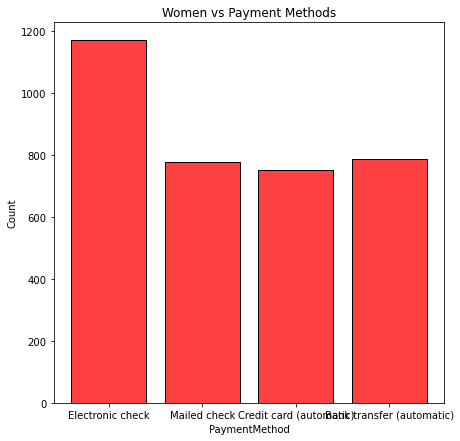

In [228]:
plt.figure(figsize=(7,7))
x=data[data['gender']=='Female']
sns.histplot(data=x, x="PaymentMethod", shrink=.8, color='r',legend=True).set_title("Women vs Payment Methods")

Text(0.5, 1.0, 'Men vs Payment Methods')

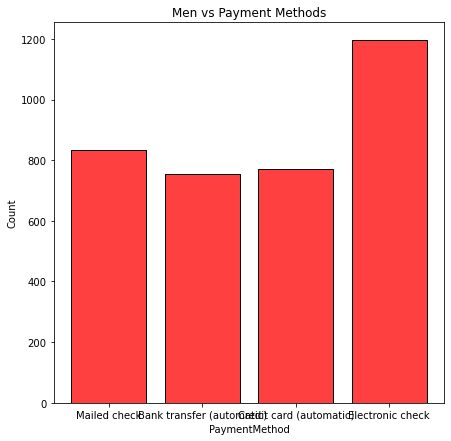

In [229]:
plt.figure(figsize=(7,7))
x=data[data['gender']=='Male']
sns.histplot(data=x, x="PaymentMethod", shrink=.8, color='r',legend=True).set_title("Men vs Payment Methods")

1) Most preferred payment Methods: Elctronic Check
2) Mailed check is the least prefered payment method by senior citizens but it is the 2nd highest preferred in younger citizen criteria
3) Credit card is the least used payment methods in younger generation